Pure Random Walk (Yt = Yt-1 + εt ) Random walk predicts that the value at time "t" will be equal to the last period value plus a stochastic (non-systematic) component that is a white noise, which means εt is independent and identically distributed with mean "0" and variance "σ²." Random walk can also be named a process integrated of some order, a process with a unit root or a process with a stochastic trend. It is a non-mean-reverting process that can move away from the mean either in a positive or negative direction. Another characteristic of a random walk is that the variance evolves over time and goes to infinity as time goes to infinity; therefore, a random walk cannot be predicted.

In [1]:
import numpy as np
from sklearn.datasets import make_classification

In [58]:
X, y = make_classification(
    n_samples=50000,
    n_features=500,
    n_informative=5,
    n_redundant=20,
    n_clusters_per_class=3,
    random_state=7422,
    flip_y=0.2)

In [59]:
## generate 5 splits of the data from the same distribution

from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(n_splits=5)

X_sets = []
y_sets = []
for train, test in skf.split(X, y):
    X_sets.append(X[train])
    y_sets.append(y[train])

In [60]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

model = rfc()
# X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_sets[0], y_sets[0])
preds = model.predict(X_sets[1])
print(classification_report(y_sets[1], preds))

/home/tms/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94     19955
           1       0.95      0.92      0.93     20045

    accuracy                           0.94     40000
   macro avg       0.94      0.94      0.94     40000
weighted avg       0.94      0.94      0.94     40000



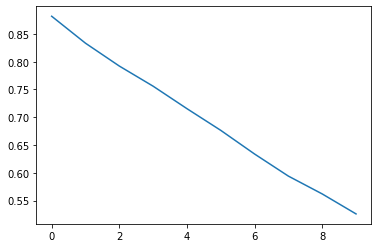

In [61]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline
scores = []
X_drift_1 = X_sets[1]

for i in range(10):
    noise = np.random.random((500)) * 0.2
    X_drift_1 = X_drift_1  + noise
    preds = model.predict(X_drift_1)
    scores.append(f1_score(preds, y_sets[1]))
plt.plot(scores)

Random Walk with Drift (Yt = α + Yt-1 + εt ) If the random walk model predicts that the value at time "t" will equal the last period's value plus a constant, or drift (α), and a white noise term (εt), then the process is random walk with a drift. It also does not revert to a long-run mean and has variance dependent on time.

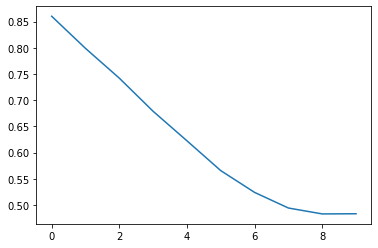

In [62]:
scores = []
X_drift_1 = X_sets[1]

for i in range(10):
    noise = np.random.random((500)) * 0.1
    X_drift_1 = X_drift_1  + noise + 0.1
    preds = model.predict(X_drift_1)
    scores.append(f1_score(preds, y_sets[1]))
plt.plot(scores)

Deterministic Trend (Yt = α + βt + εt ) Often a random walk with a drift is confused for a deterministic trend. Both include a drift and a white noise component, but the value at time "t" in the case of a random walk is regressed on the last period's value (Yt-1), while in the case of a deterministic trend it is regressed on a time trend (βt). A non-stationary process with a deterministic trend has a mean that grows around a fixed trend, which is constant and independent of time.

Random Walk with Drift and Deterministic Trend (Yt = α + Yt-1 + βt + εt ) Another example is a non-stationary process that combines a random walk with a drift component (α) and a deterministic trend (βt). It specifies the value at time "t" by the last period's value, a drift, a trend and a stochastic component. (To learn more about random walks and trends, see our Financial Concepts tutorial.)

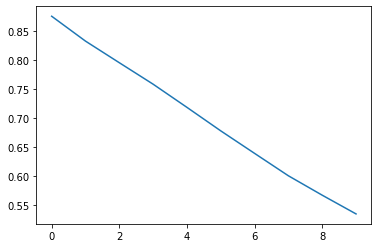

In [63]:
scores = []
X_drift_1 = X_sets[1]
alpha = 0.01
beta = 0.1

for i in range(10):
    noise = np.random.random((500)) * 0.01
    X_drift_1 = X_drift_1  + beta
    preds = model.predict(X_drift_1 + alpha + noise)
    scores.append(f1_score(preds, y_sets[1]))
plt.plot(scores)